<a href="https://colab.research.google.com/github/aimerou/notebooks/blob/master/computer_vision/image_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir known

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/Elon_Musk.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/0/01/Bill_Gates_July_2014.jpg -O known/Bill_Gates.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/3/30/Angela_merkel_1.jpg -O known/Angela_Merkel.jpg

In [ ]:
!mkdir test

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/d/d6/Sundar_pichai.png -O test/1.jpg
!wget  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg -O test/2.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/5/51/Angela_merkel_2.jpg -O test/3.jpg

In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width,height))

In [ ]:
known_dir = 'known'
test_dir = 'test'

In [ ]:
known_encodings = [] 
known_names = []
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

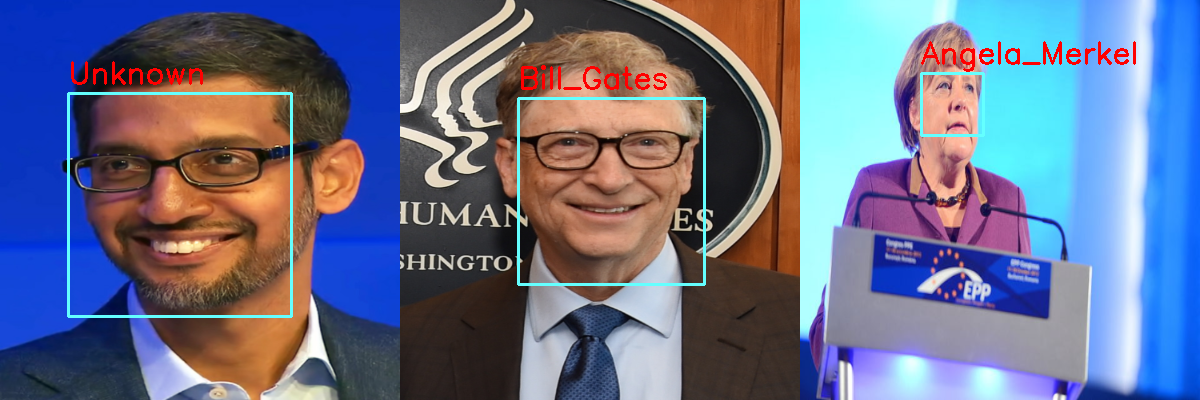

In [ ]:
images = []

for file in os.listdir(test_dir):
 img = read_img(test_dir + '/' + file)
 img = cv2.resize(img, (400,400))
 img_enc = face_recognition.face_encodings(img)[0]
 results = face_recognition.compare_faces(known_encodings,img_enc)
 res = [i for i, val in enumerate(results) if val]
 if not res:
   name = "Unknown"
 else:
   name = known_names[res[0]]
 # Drawing a rectangle box around the faces of test images
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 y = top - 10 if top - 10 > 10 else top + 10
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 # Drawing Rectangle
 cv2.putText(img, name, (left,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
 images.append(img)

images_concat = np.concatenate((images[0], images[1], images[2]), axis=1)
cv2_imshow(images_concat)

In [ ]:
''' from google.colab import files
cv2.imwrite('celebrities_face_recognition.jpg', images_concat)
files.download('celebrities_face_recognition.jpg') '''